# Lecture 8 – Visualizing Categorical Variables

## Data 6, Summer 2022

In [1]:
from datascience import * # datascience has plotting features built in
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
#Table.interactive_plots() 

## Bar Charts

Bar charts are helpful for visualizing the relationship between a categorical variable and a numerical variable, or for visualizing the distribution of a categorical variable. For example, we can visualize the number of cookies we have of each type (at our imaginary cookie store).

In [2]:
cookies = Table()
cookies = cookies.with_columns(
    "Cookie", make_array("chocolate chip", "red velvet","oatmeal raisin",  "sugar cookies", "peanut butter"),
    "Count", make_array(15, 15, 10, 10, 5)
)
cookies

Cookie,Count
chocolate chip,15
red velvet,15
oatmeal raisin,10
sugar cookies,10
peanut butter,5


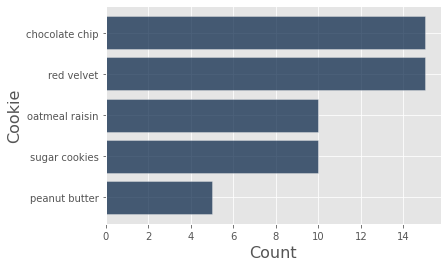

In [3]:
cookies.barh('Cookie')

### Example 1: Top 10 Songs on Spotify

The streaming service Spotify has a lot of data we can work with. For the next few questions, we will work with Spotify data from 2022. You can download an up-to-date copy of this data [here](https://spotifycharts.com/regional).

In [4]:
top_10_simple = Table.read_table('data/regional-global-daily-latest-top10.csv').select("track_name", "streams")
top_10_simple

track_name,streams
Running Up That Hill (A Deal With God) - 2018 Remaster,7208654
As It Was,6543793
Glimpse of Us,5492997
Me Porto Bonito,5416421
"Quevedo: Bzrp Music Sessions, Vol. 52",4676471
Tití Me Preguntó,4549682
Ojitos Lindos,4144625
Efecto,3722317
Left and Right (Feat. Jung Kook of BTS),3715689
Moscow Mule,3465003


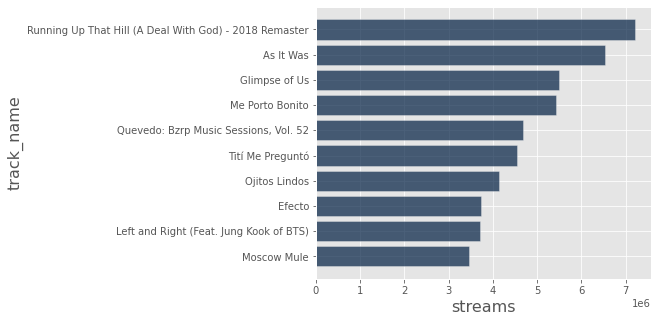

In [18]:
... # Create a bar chart of streams for each of the songs in `top_10_simple`

In the previous example, we gave you a simplified table with only two columns. What happens if we have more than two columns in a table?

In [19]:
top_10 = Table.read_table('data/regional-global-daily-latest-top10.csv')
top_10

rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,Kate Bush,Running Up That Hill (A Deal With God) - 2018 Remaster,Rhino,1,1,41,7208654
2,Harry Styles,As It Was,Columbia,1,2,99,6543793
3,Joji,Glimpse of Us,88rising Music/Warner Records,1,3,28,5492997
4,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,2,4,63,5416421
5,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",DALE PLAY Records,5,-1,1,4676471
6,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,4,5,63,4549682
7,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,2,6,63,4144625
8,Bad Bunny,Efecto,Rimas Entertainment LLC,7,8,63,3722317
9,"Charlie Puth, BTS, Jung Kook",Left and Right (Feat. Jung Kook of BTS),Atlantic Records,3,7,14,3715689
10,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,1,9,63,3465003


If we try to use the same `.barh()` format from above, our cell will cause an error.

In [21]:
top_10.barh('track_name') # This code causes an error

ValueError: The column 'artist_names' contains non-numerical values. A plot cannot be drawn for this column.

Instead, we need to specify a second argument, which tells Python which column to use as the **numerical variable** on the y axis.

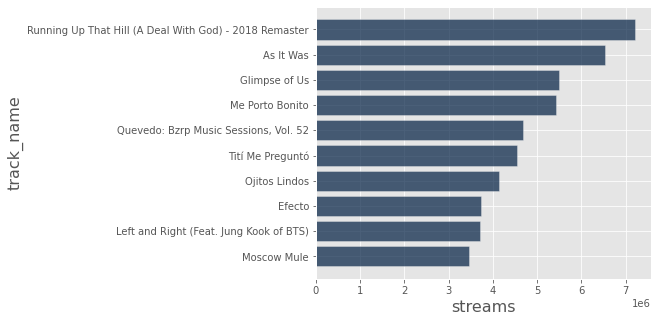

In [22]:
... # Create a bar chart of streams for each of the songs in `top_10`

## `sort`

Sometimes, our bar charts are still hard to understand intuitively because they are in an order that doesn't make sense (or doesn't provide us with much information):

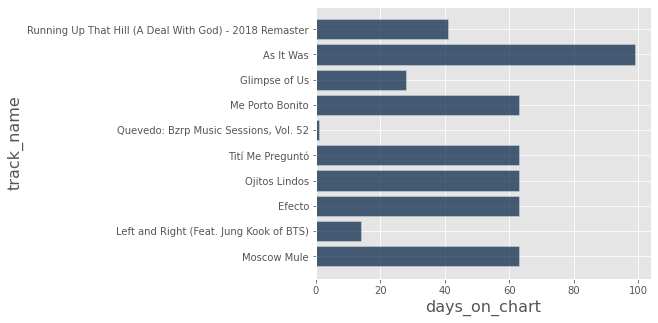

In [23]:
top_10.barh('track_name', 'days_on_chart')

When there is some inherent order to the categories (e.g. the top songs sorted by number of streams or days on the Top 200), we can sort the rows first before calling `.barh()` to ensure that the bars in the bar chart are sorted. 

To sort rows in a table, we will use `tbl.sort(column)`. This function takes the argument `column`, which is the name of the column in the table to sort by, and an optional argument `descending` which can either be `True` or `False`, depending on whether we want to sort the table in ascending or descending order.

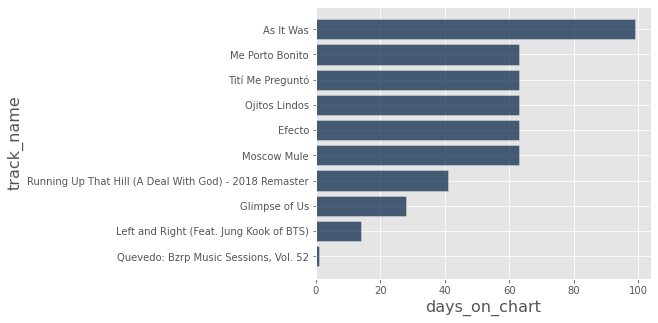

In [24]:
top_10.sort('days_on_chart', descending=True).barh('track_name', 'days_on_chart')

The code above is the same as the code below! Remember that you can break larger problems up into smaller chunks this way.

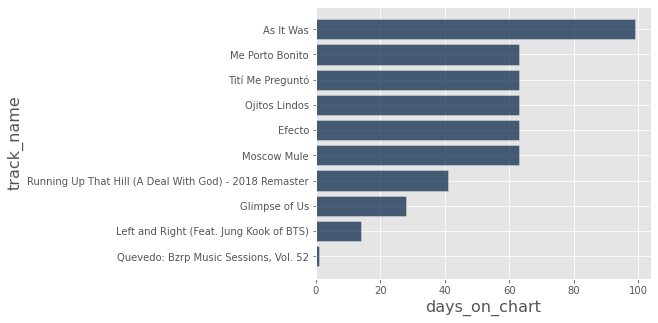

In [25]:
top_10_sorted = top_10.sort('days_on_chart', descending=True)
top_10_sorted.barh('track_name', 'days_on_chart')

## `take`

Now, we are going to load in the full table of the Spotify Top 200.

In [30]:
streams = Table.read_table('data/regional-global-daily-latest.csv')
streams

rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,Kate Bush,Running Up That Hill,Rhino,1,1,41,7208654
2,Harry Styles,As It Was,Columbia,1,2,99,6543793
3,Joji,Glimpse of Us,88rising Music/Warner Records,1,3,28,5492997
4,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,2,4,63,5416421
5,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",DALE PLAY Records,5,-1,1,4676471
6,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,4,5,63,4549682
7,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,2,6,63,4144625
8,Bad Bunny,Efecto,Rimas Entertainment LLC,7,8,63,3722317
9,"Charlie Puth, BTS, Jung Kook",Left and Right (Feat. Jung Kook of BTS),Atlantic Records,3,7,14,3715689
10,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,1,9,63,3465003


If we try to visualize all 200 songs in one chart, that chart will end up being really long and unwieldy. 

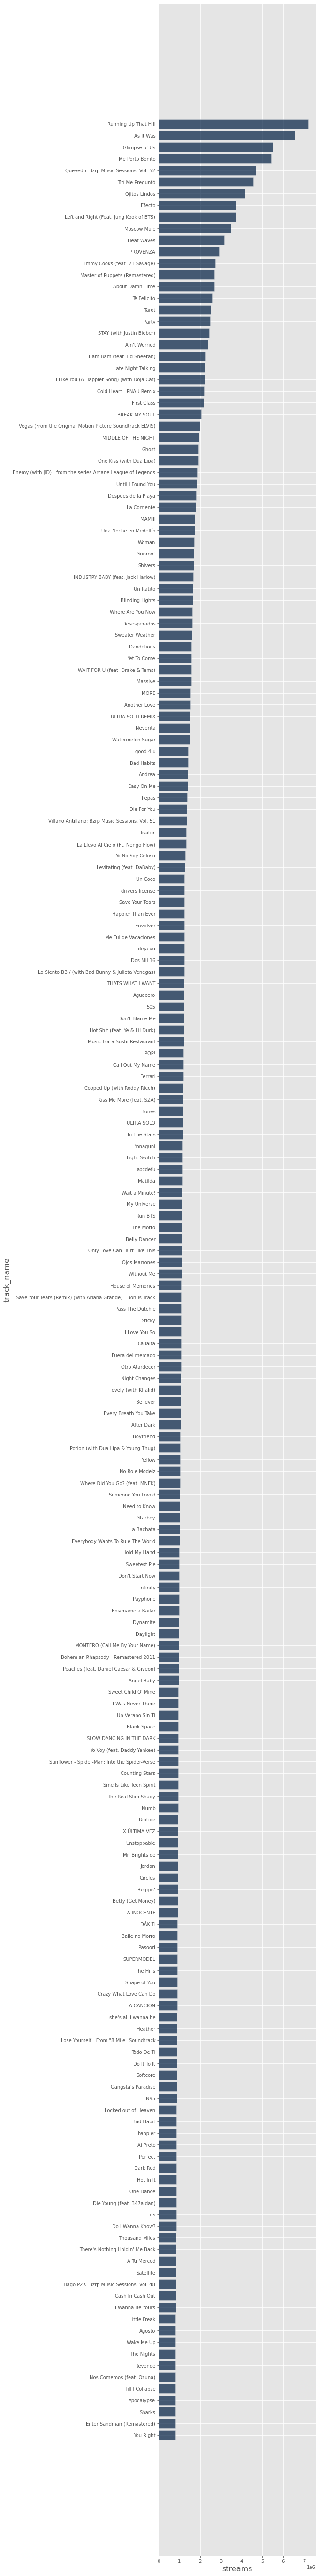

In [31]:
streams.barh('track_name', 'streams')

So instead, we will manually _take_ the first 10 rows of the table in order to make our visualization. We can accomplish this using the `tbl.take(index)` function, which will take certain rows from the original table based on their index. For right now, we will be using `.take` in this format: `tbl.take(np.arange(10))`, where the number indicates how many rows to take, starting from the top of the table.

In [32]:
top_10 = streams.take(np.arange(10))
top_10

rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,Kate Bush,Running Up That Hill,Rhino,1,1,41,7208654
2,Harry Styles,As It Was,Columbia,1,2,99,6543793
3,Joji,Glimpse of Us,88rising Music/Warner Records,1,3,28,5492997
4,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,2,4,63,5416421
5,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",DALE PLAY Records,5,-1,1,4676471
6,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,4,5,63,4549682
7,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,2,6,63,4144625
8,Bad Bunny,Efecto,Rimas Entertainment LLC,7,8,63,3722317
9,"Charlie Puth, BTS, Jung Kook",Left and Right (Feat. Jung Kook of BTS),Atlantic Records,3,7,14,3715689
10,Bad Bunny,Moscow Mule,Rimas Entertainment LLC,1,9,63,3465003


Now, when we generate our bar chart, we are able to visualize all ten songs very easily.

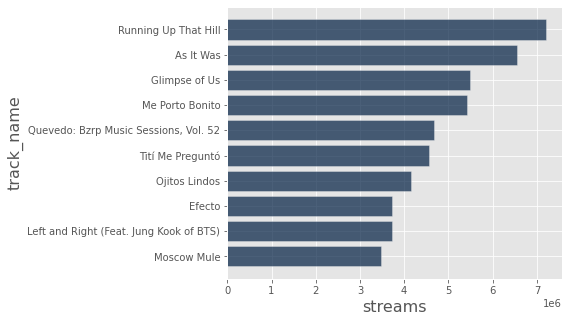

In [33]:
... # Generate a bar chart of streams by song

## Quick Check 1

Given `streams_top_15`, a table of the top 15 most streamed songs, generate a bar chart showing how many streams each artist has.

In [37]:
streams_top_15 = streams.sort('streams', descending=True).take(np.arange(15)) \
                        .select('artist_names', 'track_name', 'streams')
streams_top_15

artist_names,track_name,streams
Kate Bush,Running Up That Hill,7208654
Harry Styles,As It Was,6543793
Joji,Glimpse of Us,5492997
"Bad Bunny, Chencho Corleone",Me Porto Bonito,5416421
"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",4676471
Bad Bunny,Tití Me Preguntó,4549682
"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4144625
Bad Bunny,Efecto,3722317
"Charlie Puth, BTS, Jung Kook",Left and Right (Feat. Jung Kook of BTS),3715689
Bad Bunny,Moscow Mule,3465003


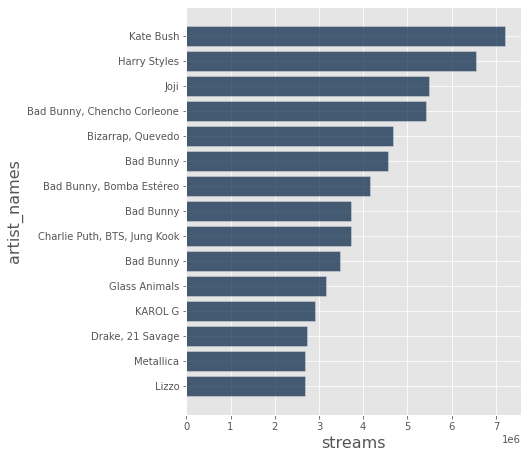

In [38]:
streams_top_15.barh(...) # Create a bar chart showing the artists with the number of streams they have

Notice how the artist Bad Bunny has multiple songs in the top 15, but his total streams are not counted together? We will learn how to consolidate all of the songs by a single artist soon...

## Grouping Bars

When two numerical variables have the same scale or magnitude, it is sometimes useful to visualize these variables together. For example, we have a column in `top_10` called `rank`, which is the current rank of a song. We also have a column `peak_rank`, which is the highest rank on the charts that the song achieved at any point.

In [58]:
top_10.select('rank', 'track_name', 'peak_rank')

rank,track_name,peak_rank
1,Running Up That Hill,1
2,As It Was,1
3,Glimpse of Us,1
4,Me Porto Bonito,2
5,"Quevedo: Bzrp Music Sessions, Vol. 52",5
6,Tití Me Preguntó,4
7,Ojitos Lindos,2
8,Efecto,7
9,Left and Right (Feat. Jung Kook of BTS),3
10,Moscow Mule,1


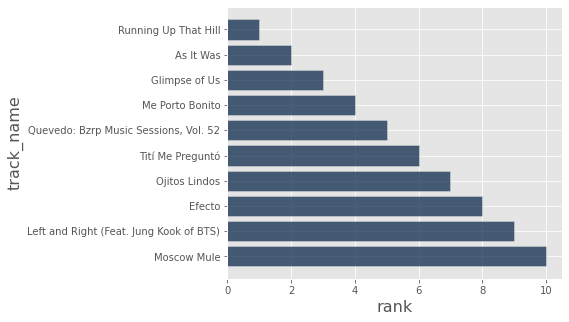

In [40]:
top_10.barh('track_name', 'rank')

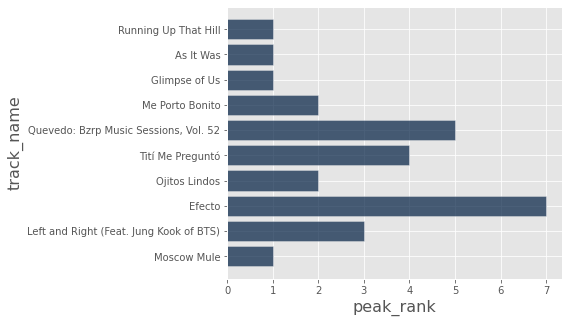

In [41]:
top_10.barh('track_name', 'peak_rank')

Since both of these variables have the same scale, we can easily visualize them togther in one bar chart. To do this, we need to make sure our table only has the three columns `track_name`, `rank` and `peak_rank`. Then we can call `.barh()` to make an overlaid/groupped bar chart.

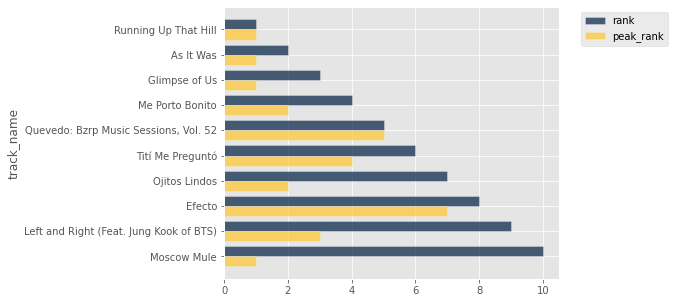

In [43]:
... # Create a grouped bar chart showing `rank` and `peak_rank` for each song

If we prefer to visualize these variables separately, we can eliminate the overlay by setting the optional argument `overlay` to `False`.

In [5]:
... # Create two separate bar charts showing `rank` and `peak_rank` for each song
# (Hint: set `overlay=False`)

Ellipsis